In [35]:
import umap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [4]:
data = pd.read_csv('fetal_health.csv')

In [6]:
X_data, y = data.iloc[:,:-1], data['fetal_health']

In [8]:
data.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [9]:
data.duplicated().sum()

13

In [10]:
data['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [107]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [99]:
pca = PCA(n_components=15)

In [100]:
X_pca = pca.fit_transform(X_data)

In [101]:
X_pca.shape

(2126, 15)

In [113]:
t_sne = TSNE(n_components=3)

In [114]:
X_embedding = t_sne.fit_transform(X_data)

In [117]:
dic_data = {'Comp 1':X_embedding[:,0], 'Comp 2':X_embedding[:,1], 'Comp 3':X_embedding[:,2], 'Target':y.values}

In [118]:
dic_tsne = pd.DataFrame(dic_data)

dic_tsne.head()

,Comp 1,Comp 2,Comp 3,Target
0,3.034915,9.259391,1.577087,2.0
1,12.481915,-8.750248,1.994936,1.0
2,12.481585,-8.760978,2.005801,1.0
3,8.872585,-7.131782,5.571202,1.0
4,8.897322,-7.139438,5.480095,1.0


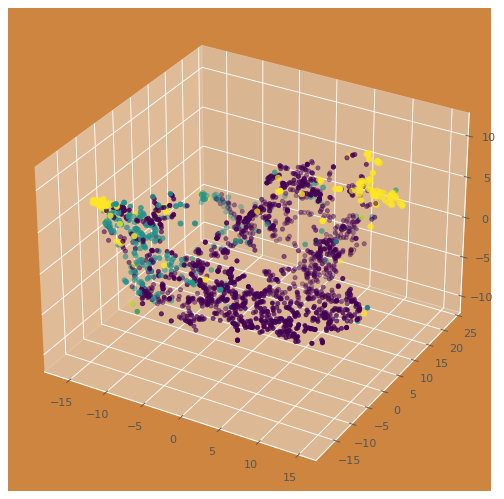

In [142]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

fig = plt.figure(figsize=(8,8), dpi=80)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dic_tsne['Comp 3'], dic_tsne['Comp 1'], dic_tsne['Comp 2'], c=dic_tsne['Target'],
           s=(dic_tsne['Target']+2)*5)
ax.set_facecolor('peru')

In [143]:
from sklearn.model_selection import train_test_split

In [145]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], stratify=data.iloc[:,-1], random_state=1,
                                                   test_size=0.4)

In [148]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [193]:
def report(y_true, y_pred):
    
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    
    fig = plt.figure(figsize=(10,6), dpi=80)
    ax = fig.gca()
    
    sns.heatmap(cm, annot=True, cmap='bwr', cbar=True, ax=ax)
    ax.set_title('Confusion Matrix')
    plt.show()

In [278]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=np.nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [279]:
model.fit(X_train, y_train)

C:\Users\Jean\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:07:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

C:\Users\Jean\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


              precision    recall  f1-score   support

         1.0       0.95      0.99      0.97       663
         2.0       0.94      0.72      0.82       118
         3.0       0.93      0.96      0.94        70

    accuracy                           0.95       851
   macro avg       0.94      0.89      0.91       851
weighted avg       0.95      0.95      0.95       851



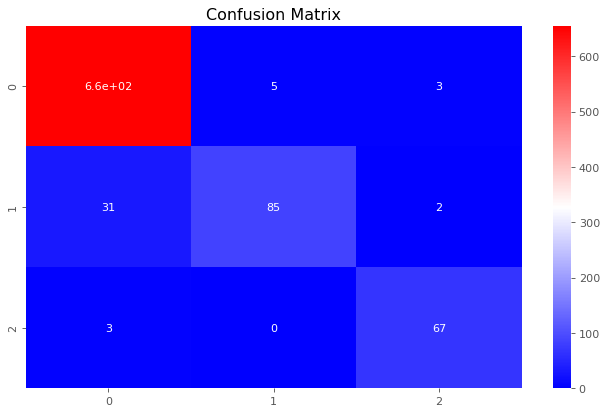

In [280]:
report(y_test, model.predict(X_test))

In [197]:
from sklearn.model_selection import cross_val_score

In [281]:
cross_val_score(model, X_test, y_test, cv=3, scoring='accuracy')

C:\Users\Jean\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:08:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jean\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\Jean\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:08:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jean\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\Jean\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:08:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Jean\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


array([0.92605634, 0.95070423, 0.90812721])

C:\Users\Jean\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       992
         2.0       1.00      0.99      0.99       177
         3.0       1.00      1.00      1.00       106

    accuracy                           1.00      1275
   macro avg       1.00      1.00      1.00      1275
weighted avg       1.00      1.00      1.00      1275



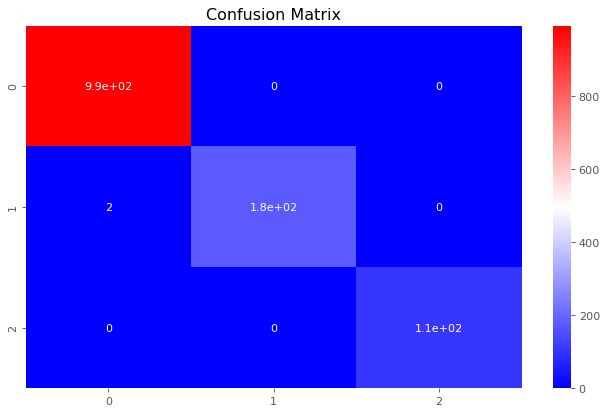

In [282]:
report(y_train, model.predict(X_train))

In [286]:
from imblearn.over_sampling import SMOTE

Text(0.5, 1.0, 'feature importances')

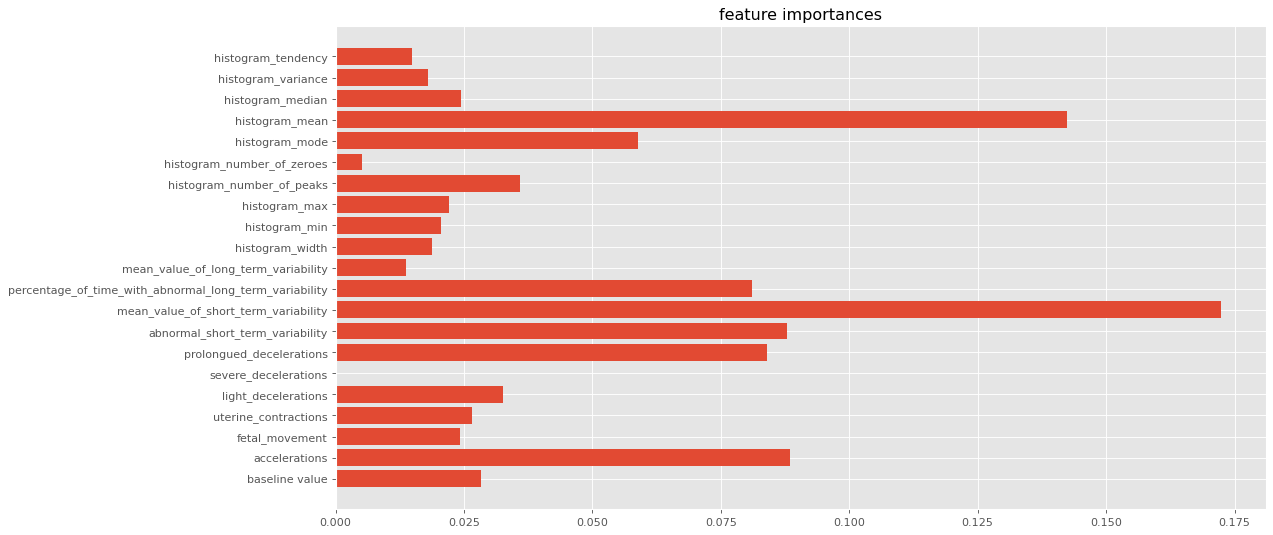

In [183]:
fig = plt.figure(figsize=(15,8), dpi=80)
ax = fig.gca()

ax.barh(X_test.columns ,model.feature_importances_)
ax.set_title('feature importances')

In [288]:
smote = SMOTE(k_neighbors=3, random_state=3, sampling_strategy='not majority')

In [293]:
X_smote, y_smote = smote.fit_resample(X_test, y_test)

C:\Users\Jean\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


              precision    recall  f1-score   support

         1.0       0.78      0.99      0.87       663
         2.0       0.97      0.74      0.84       663
         3.0       0.98      0.96      0.97       663

    accuracy                           0.90      1989
   macro avg       0.91      0.90      0.90      1989
weighted avg       0.91      0.90      0.90      1989



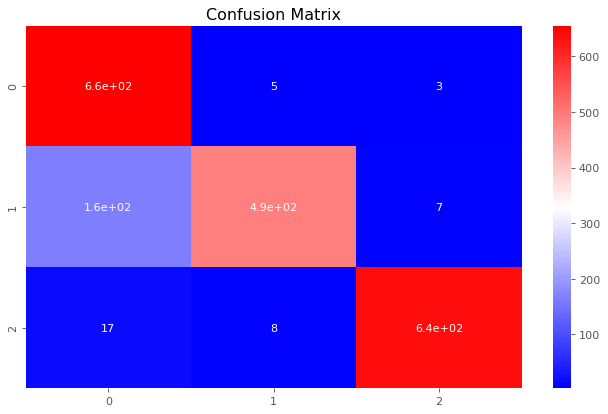

In [297]:
report(y_smote, model.predict(X_smote))